In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

In [2]:
#ファイルの読み込み
data=pd.read_csv('data_datetime.csv',parse_dates=[0])
data0=data
#factor1がunspecifiedな行を削除
data=data[data['CONTRIBUTING FACTOR VEHICLE 1'] !='Unspecified']
data_AllMonth=data0[(data0['DATETIME'].dt.year==2013)|\
                  (data0['DATETIME'].dt.year==2014)|\
                  (data0['DATETIME'].dt.year==2015)|\
                  (data0['DATETIME'].dt.year==2016)]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
list_Cont=list((data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().index)[:20])
list_Street=list((data['ON STREET NAME'].value_counts().index)[:1000])
list_Vehicle=list((data['VEHICLE TYPE CODE 1'].value_counts().index)[:13])

In [6]:
#日時のカラム化、少数の事故原因・車種をohtersに、
data4=data
data4['hour']=data['DATETIME'].dt.hour
data4['month']=data['DATETIME'].dt.month
data4['weekday']=data['DATETIME'].dt.weekday
data4['CONTRIBUTING FACTOR']=data4['CONTRIBUTING FACTOR VEHICLE 1'].apply( lambda x: x if x in list_Cont else 'Ohters')
data4['VEHICLE TYPE']=data4['VEHICLE TYPE CODE 1'].apply(lambda x: x if x in list_Vehicle else 'Ohters')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [7]:
#日時のカラム化、少数の事故原因・車種をohtersに、
data0['hour']=data0['DATETIME'].dt.hour
data0['month']=data0['DATETIME'].dt.month
data0['weekday']=data0['DATETIME'].dt.weekday
#data0['CONTRIBUTING FACTOR']=data0['CONTRIBUTING FACTOR VEHICLE 1'].apply( lambda x: x if x in list_Cont else 'Ohters')
data0['VEHICLE TYPE']=data0['VEHICLE TYPE CODE 1'].apply(lambda x: x if x in list_Vehicle else 'Ohters')

In [8]:
#歩行者・自転車被害者　と　自動車被害者　を識別するカラム生成
data5=data4
data5['dam_Ped']=((data5['NUMBER OF PEDESTRIANS INJURED'] > 0) | (data5['NUMBER OF PEDESTRIANS KILLED']>0)\
                   |(data5['NUMBER OF CYCLIST INJURED']>0) | (data5['NUMBER OF CYCLIST KILLED']>0)).astype(int)
data5['dam_Ped_only']=((data5['NUMBER OF PEDESTRIANS INJURED'] > 0) | (data5['NUMBER OF PEDESTRIANS KILLED']>0)).astype(int)
data5['dam_Car']=((data5['NUMBER OF MOTORIST INJURED'] > 0) | (data5['NUMBER OF MOTORIST KILLED']>0)).astype(int)
data5['dam']=((data5['NUMBER OF PERSONS INJURED'] > 0) | (data5['NUMBER OF PERSONS KILLED']>0)).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [9]:
#歩行者・自転車被害者　と　自動車被害者　を識別するカラム生成
data0['dam_Ped']=((data0['NUMBER OF PEDESTRIANS INJURED'] > 0) | (data0['NUMBER OF PEDESTRIANS KILLED']>0)\
                   |(data0['NUMBER OF CYCLIST INJURED']>0) | (data0['NUMBER OF CYCLIST KILLED']>0)).astype(int)
data0['dam_Ped_only']=((data0['NUMBER OF PEDESTRIANS INJURED'] > 0) | (data0['NUMBER OF PEDESTRIANS KILLED']>0)).astype(int)
data0['dam_Car']=((data0['NUMBER OF MOTORIST INJURED'] > 0) | (data0['NUMBER OF MOTORIST KILLED']>0)).astype(int)
data0['dam']=((data0['NUMBER OF PERSONS INJURED'] > 0) | (data0['NUMBER OF PERSONS KILLED']>0)).astype(int)

In [6]:
data5.dam_Ped.value_counts()
data5.dam_Car.value_counts()
data5.dam.value_counts()

0    463323
1    114271
Name: dam, dtype: int64

In [16]:
pv=data5[data5['VEHICLE TYPE CODE 1']=='PASSENGER VEHICLE']
pv0=data0[data0['VEHICLE TYPE CODE 1']=='PASSENGER VEHICLE']
#pv.info()

In [17]:
pv['la'] = pv['LATITUDE'].map(lambda x : round(float(x),3))
pv['lo'] = pv['LONGITUDE'].map(lambda x : round(float(x),3))
pv0['la'] = pv0['LATITUDE'].map(lambda x : round(float(x),3))
pv0['lo'] = pv0['LONGITUDE'].map(lambda x : round(float(x),3))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [19]:
pv_YRW=pv[pv['CONTRIBUTING FACTOR']=='Failure to Yield Right-of-Way']
pv_TI=pv[pv['CONTRIBUTING FACTOR']=='Turning Improperly']
pv_TI_freq=pv_TI[(((pv_TI['month']==3)|(pv_TI['month']==4))|(pv_TI['month']==9)|(pv_TI['month']==10))&\
                   ((pv_TI['hour']<19)&(pv_TI['hour']>=14))]
pv_TI_freq_drop_lo=pv_TI_freq.dropna(subset=['lo'])
pv_TI_freq_drop_lalo=pv_TI_freq_drop_lo.dropna(subset=['la'])

#事故原因別では、data5とdata0に違いはない
pv0_YRW=pv0[pv0['CONTRIBUTING FACTOR VEHICLE 1']=='Failure to Yield Right-of-Way']
pv0_TI=pv0[pv0['CONTRIBUTING FACTOR VEHICLE 1']=='Turning Improperly']
pv0_TI_freq=pv0_TI[(((pv0_TI['month']==3)|(pv0_TI['month']==4))|(pv0_TI['month']==9)|(pv0_TI['month']==10))&\
                   ((pv0_TI['hour']<19)&(pv0_TI['hour']>=14))]
pv0_TI_freq_drop_lo=pv0_TI_freq.dropna(subset=['lo'])
pv0_TI_freq_drop_lalo=pv0_TI_freq_drop_lo.dropna(subset=['la'])

In [20]:
pv_YRW_dam0=pv_YRW[pv_YRW['dam']==0]
pv_YRW_dam=pv_YRW[pv_YRW['dam']==1]

pv0_YRW_dam0=pv0_YRW[pv0_YRW['dam']==0]
pv0_YRW_dam=pv0_YRW[pv0_YRW['dam']==1]

## pv0 被害者別分布

In [41]:
def la_lo_plot(data1,data2):
    ax=data1.plot.scatter(x='lo', y='la', color='red', label='dam=0');
    data2.plot.scatter(x='lo', y='la', color='blue',label='dam!=0',ax=ax);
    plt.xlim(-74.3, -73.6)
    plt.ylim(40.45, 41)

In [55]:
pv_DI=pv[pv['CONTRIBUTING FACTOR']=='Driver Inattention/Distraction']

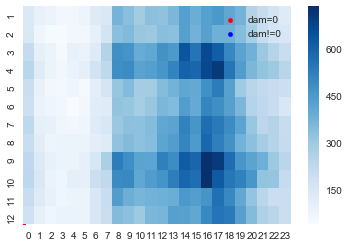

In [58]:
la_lo_plot(pv_DI[pv_DI['dam']==0],pv_DI[pv_DI['dam']==1])
heatmap_dt(pv_DI)

In [59]:
pv_DI_freq=pv_DI[(((pv_DI['month']==3)|(pv_DI['month']==4))|(pv_DI['month']==9)|(pv_DI['month']==10))&\
                   ((pv_DI['hour']<19)&(pv_DI['hour']>=14))]

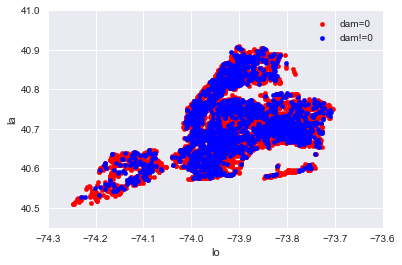

In [61]:
la_lo_plot(pv_DI_freq[pv_DI_freq['dam']==0],pv_DI_freq[pv_DI_freq['dam']==1])

## pv_TI被害者の有無

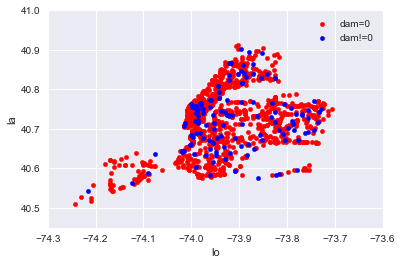

In [42]:
la_lo_plot(pv0_TI_freq_drop_lalo[pv0_TI_freq_drop_lalo['dam']==0],pv0_TI_freq_drop_lalo[pv0_TI_freq_drop_lalo['dam']==1])

## pv_TI 歩行者被害が起こった場所

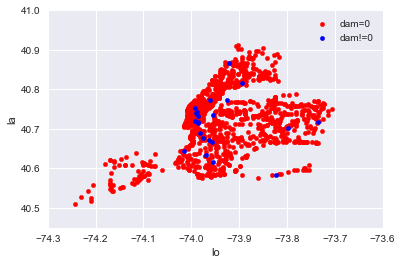

In [43]:
la_lo_plot(pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped']==0],pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped']==1])

In [62]:
pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped']==1].to_csv('PV_Turning_Improperly_freq.csv')

## pv_TI 自動車被害が起こった場所

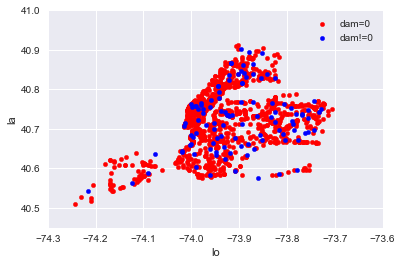

In [44]:
la_lo_plot(pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Car']==0],pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Car']==1])

(40.450, 41)

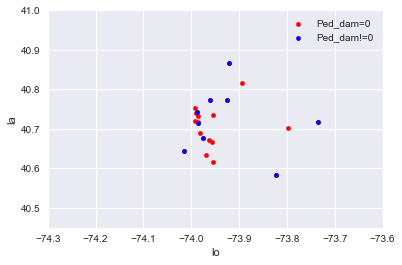

In [48]:
ax=pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped']==1].plot.scatter(x='lo', y='la', color='red', label='Ped_dam=0');
pv_TI_freq_drop_lalo[pv_TI_freq_drop_lalo['dam_Ped_only']==1].plot.scatter(x='lo', y='la', color='blue',label='Ped_dam!=0',ax=ax);
plt.xlim(-74.3, -73.6)
plt.ylim(40.45, 41)

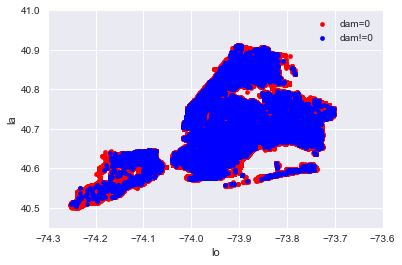

In [46]:
la_lo_plot(pv0[pv0['dam_Ped']==0],pv0[pv0['dam_Ped']==1])

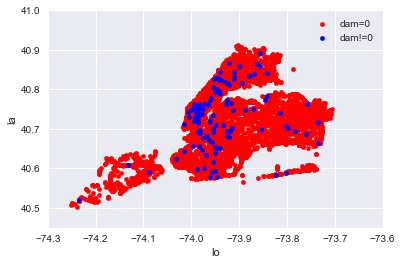

In [47]:
la_lo_plot(pv0_TI[pv0_TI['dam_Ped']==0],pv0_TI[pv0_TI['dam_Ped']==1])

In [15]:
def heatmap_dt(data):
    month_heatmap=pd.DataFrame(index=[])
    weekday_heatmap=pd.DataFrame(index=[])
    for i in range(24):
        #Series=data[data['hour']==i]['month'].value_counts().sort_index()
        month_heatmap=month_heatmap.append(data[data['hour']==i]['month'].value_counts().sort_index(),ignore_index = True)
        weekday_heatmap=weekday_heatmap.append(data[data['hour']==i]['weekday'].value_counts().sort_index(),ignore_index = True)
    sns.heatmap(month_heatmap.T,cmap="Blues")
    #sns.heatmap(weekday_heatmap.T,cmap="Blues")

In [33]:
def heatmap_double(data1,data2):
    fig = plt.figure(figsize=(24,7))
    plt.rcParams["font.size"] = 30
    ax1=fig.add_subplot(1,2,1)
    heatmap_dt(data1)
    plt.title("dam=0")
    plt.xlabel("hour")
    plt.ylabel("month")
    
    ax2=fig.add_subplot(1,2,2)
    heatmap_dt(data2)
    plt.title("dam!=0")
    plt.xlabel("hour")
    plt.ylabel("month")

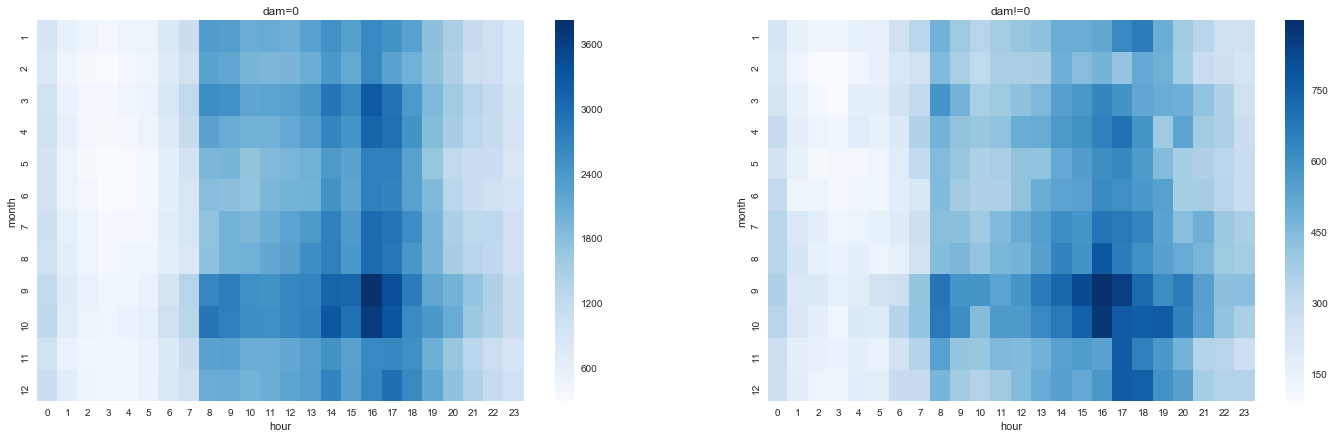

In [37]:
#unspecified除いた全データ
heatmap_double(data5[data5.dam==0],data5[data5.dam==1])

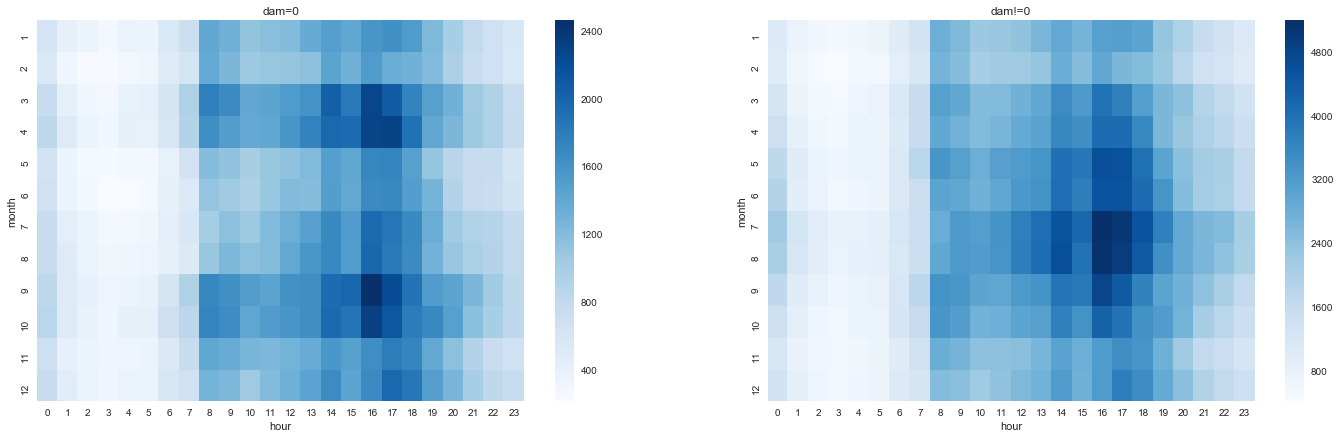

In [54]:
heatmap_double(pv,pv0)

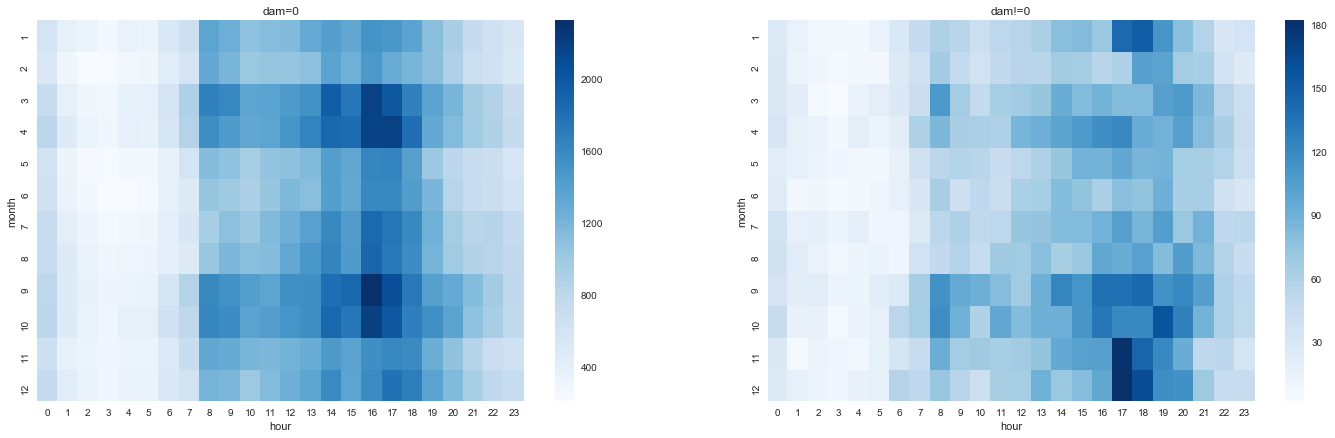

In [64]:
#unspecified無し、PVのみのデータ
heatmap_double(pv[pv['dam_Ped']==0],pv[pv['dam_Ped']==1])

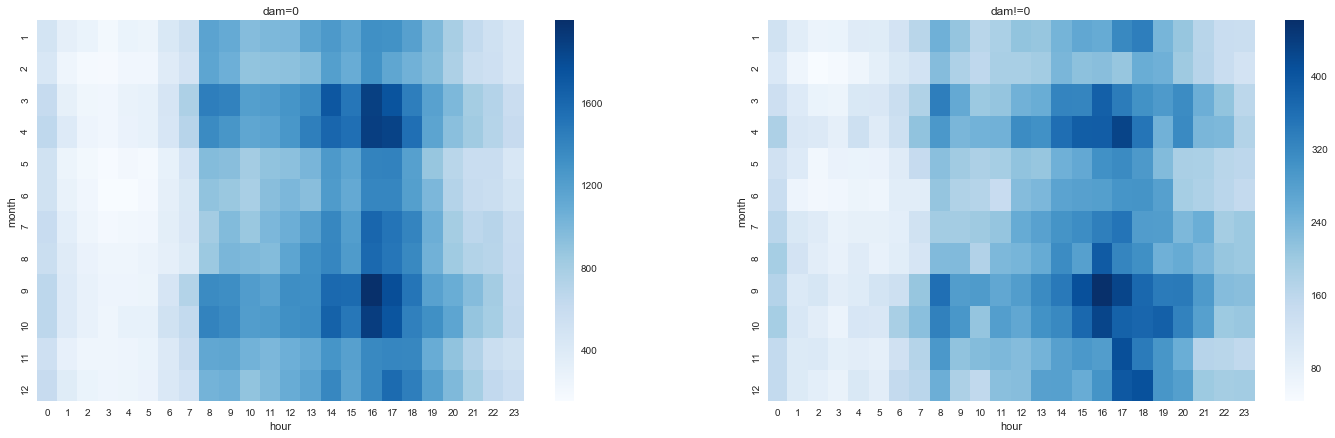

In [36]:
#unspecified無し、PVのみのデータ
heatmap_double(pv0[pv0.dam==0],pv0[pv0.dam==1])

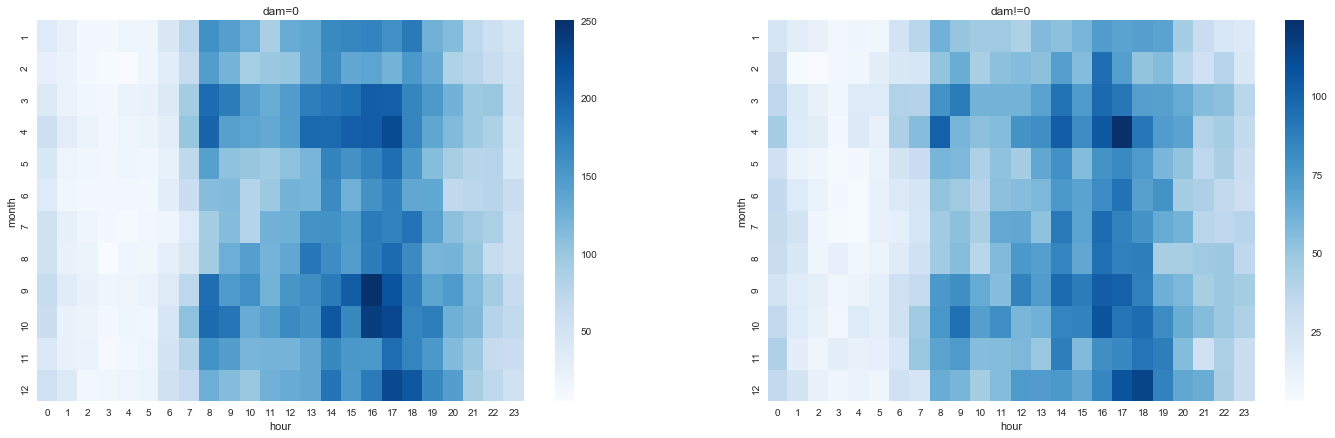

In [48]:
heatmap_double(pv_YRW,pv_TI)

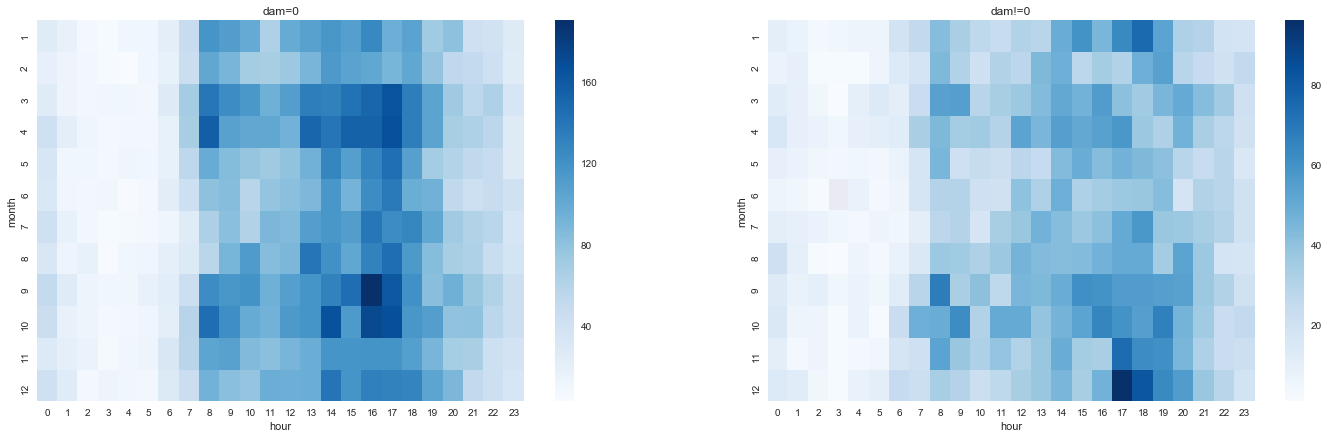

In [35]:
#unspecified無し、PVのみ、事故原因YRWのデータ
heatmap_double(pv_YRW_dam0,pv_YRW_dam)

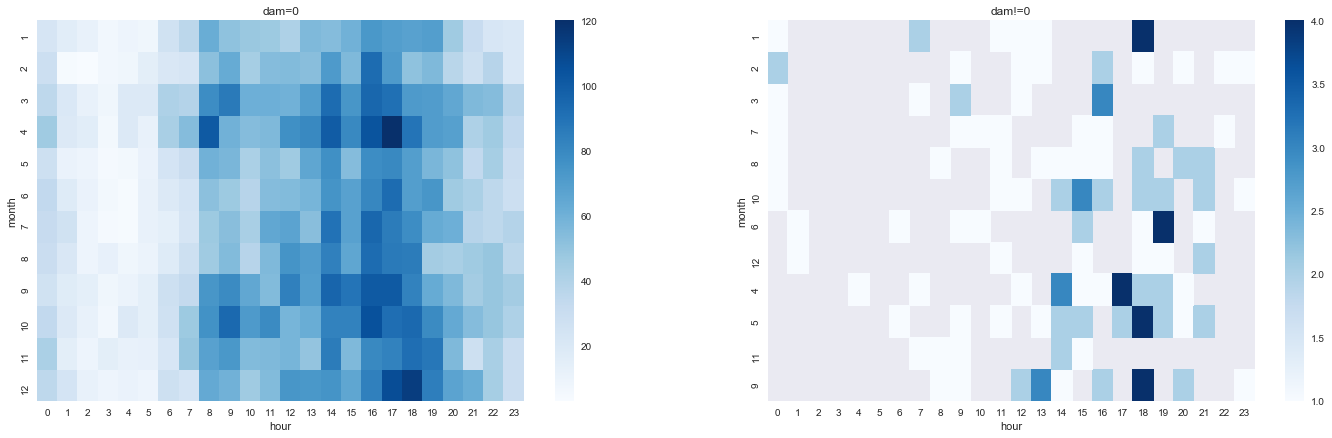

In [40]:
#unspecified無し、PVのみ、事故原因TIのデータ
heatmap_double(pv_TI[pv_TI['dam_Ped']==0],pv_TI[pv_TI['dam_Ped']==1])

In [24]:
def allmonth(data):
    df=data[(data['DATETIME'].dt.year==2013)|\
                  (data['DATETIME'].dt.year==2014)|\
                  (data['DATETIME'].dt.year==2015)|\
                  (data['DATETIME'].dt.year==2016)]
    return df

In [27]:
allmonth(pv[pv['dam']==0])

,DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,month,weekday,CONTRIBUTING FACTOR,VEHICLE TYPE,dam_Ped,dam_Ped_only,dam_Car,dam,la,lo
109014,2016-12-29 00:00:00,NaN,NaN,40.844107,-73.897997,"(40.8441075, -73.8979971)",NaN,NaN,NaN,0,...,12,3,Oversized Vehicle,PASSENGER VEHICLE,0,0,0,0,40.844,-73.898
109580,2016-12-28 09:00:00,NaN,NaN,NaN,NaN,NaN,2 AVENUE,NaN,NaN,0,...,12,2,Unsafe Lane Changing,PASSENGER VEHICLE,0,0,0,0,NaN,NaN
110147,2016-12-21 19:50:00,NaN,NaN,NaN,NaN,NaN,NEW UTRECHT AVENUE,NaN,NaN,0,...,12,2,Driver Inexperience,PASSENGER VEHICLE,0,0,0,0,NaN,NaN
110510,2016-12-19 09:00:00,NaN,NaN,NaN,NaN,NaN,1 AVENUE,NaN,NaN,0,...,12,0,Backing Unsafely,PASSENGER VEHICLE,0,0,0,0,NaN,NaN
110903,2016-12-17 04:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,12,5,Driver Inattention/Distraction,PASSENGER VEHICLE,0,0,0,0,NaN,NaN
182168,2016-12-31 00:00:00,MANHATTAN,10037,40.820437,-73.936227,"(40.8204372, -73.9362273)",WEST 145 STREET,LENOX AVENUE,NaN,0,...,12,5,Other Vehicular,PASSENGER VEHICLE,0,0,0,0,40.820,-73.936
182169,2016-12-31 00:00:00,QUEENS,11417,40.674557,-73.859593,"(40.6745572, -73.859593)",SUTTER AVENUE,NORTH CONDUIT AVENUE,NaN,0,...,12,5,Driver Inattention/Distraction,PASSENGER VEHICLE,0,0,0,0,40.675,-73.860
182182,2016-12-31 00:30:00,NaN,NaN,40.623277,-74.041490,"(40.6232768, -74.0414903)",NaN,NaN,NaN,0,...,12,5,Reaction to Other Uninvolved Vehicle,PASSENGER VEHICLE,0,0,0,0,40.623,-74.041
182183,2016-12-31 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,12,5,Following Too Closely,PASSENGER VEHICLE,0,0,0,0,NaN,NaN
182188,2016-12-31 10:00:00,QUEENS,11428,40.714632,-73.751331,"(40.7146318, -73.7513307)",JAMAICA AVENUE,209 STREET,NaN,0,...,12,5,Reaction to Other Uninvolved Vehicle,PASSENGER VEHICLE,0,0,0,0,40.715,-73.751


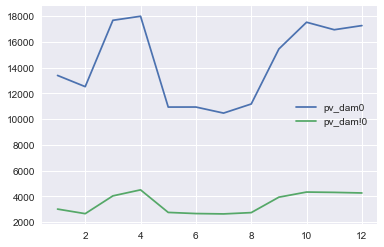

In [29]:
x=np.arange(1,13)
ax=plt.plot(x,allmonth(pv[pv['dam']==0])['month'].value_counts().sort_index(),label='pv_dam0');
plt.plot(x,allmonth(pv[pv['dam']==1])['month'].value_counts().sort_index(),label='pv_dam!0');
#plt.plot(x,pv_YRW['month'].value_counts().sort_index())
plt.legend()

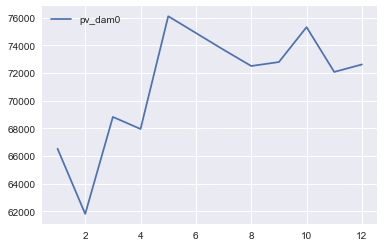

In [31]:
x=np.arange(1,13)
ax=plt.plot(x,allmonth(data0)['month'].value_counts().sort_index(),label='pv_dam0');
#plt.plot(x,allmonth(pv[pv['dam']==1])['month'].value_counts().sort_index(),label='pv_dam!0');
#plt.plot(x,pv_YRW['month'].value_counts().sort_index())
plt.legend()

In [34]:
pv0=data0[data0['VEHICLE TYPE CODE 1']=='PASSENGER VEHICLE']

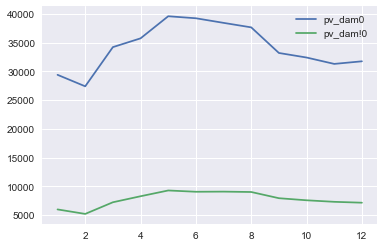

In [35]:
x=np.arange(1,13)
ax=plt.plot(x,allmonth(pv0[pv0['dam']==0])['month'].value_counts().sort_index(),label='pv_dam0');
plt.plot(x,allmonth(pv0[pv0['dam']==1])['month'].value_counts().sort_index(),label='pv_dam!0');
#plt.plot(x,pv_YRW['month'].value_counts().sort_index())
plt.legend()

In [ ]:
time = data.loc[:,['DATE','TIME']]

In [ ]:
location = data.loc[:,['la','lo']]

In [ ]:
vehicletype = data.loc[:,'VEHICLE TYPE CODE 1']

In [32]:
factor = data.loc['CONTRIBUTING FACTOR VEHICLE 1']

KeyError: 'the label [CONTRIBUTING FACTOR VEHICLE 1] is not in the [index]'

In [ ]:
data1 = pd.concat([time,location,vehicletype,factor], axis=1)

In [ ]:
data2 = data1[data1['VEHICLE TYPE CODE 1'] == 'TAXI']